# Step1: Installation and Set up


In [ ]:
# pip install tensorflow-gpu


In [ ]:
import tensorflow as tf


In [ ]:
print(tf.__version__)

2.4.1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# step 2:


In [ ]:
# import the dataset
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# loading the dataset
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [ ]:
x_train.shape , x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
np.max(x_train), np.min(x_train)

(255, 0)

In [ ]:
class_name = ['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 coat', '5 Sandal', '6 shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']
print(class_name)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 coat', '5 Sandal', '6 shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


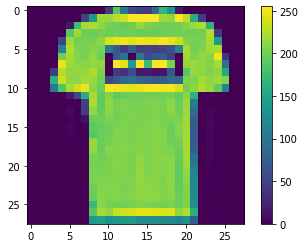

In [ ]:
# Data Exploration
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [ ]:
y_train[1]

0

In [ ]:
# Normalizing the dataset
x_train = x_train / 255.0
x_test = x_test / 255.0


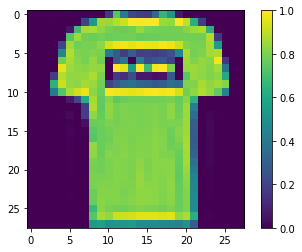

In [ ]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [ ]:
#flattern the dataset
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [ ]:

x_train.shape, x_test.shape

((60000, 784), (10000, 784))

# Building the Model

In [ ]:
# Define an object
model = tf.keras.models.Sequential()
# sequence of layers
model.add(tf.keras.layers.Input(shape=(784)))


In [ ]:
# adding first fully connected hidden layer
# 1) units(no. of neurons)
# 2) activation function = ReLU
# 3) input shape = 784
model.add(tf.keras.layers.Dense(units = 128, activation= 'relu', input_shape=(784,)))

In [ ]:
#adding second layer with dropout
model.add(tf.keras.layers.Dropout(0.3))
#regularization technique, prevent overfitting

In [ ]:
#adding output layer
#units = 10
#activation = softmax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Training the  model

In [26]:
 #compiling the model
 # 1) optimizer= adam (to minimize the loss function)
 # 2) loss function =(act as guide to optimizer)
 # 3) matrices = sparse_categorical_accuracy
 model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [28]:

print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [31]:
#training the model
model.fit(x_train, y_train, epochs=20)


Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2325 - sparse_categorical_accuracy: 0.9108
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2247 - sparse_categorical_accuracy: 0.9137
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2265 - sparse_categorical_accuracy: 0.9154
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2221 - sparse_categorical_accuracy: 0.9157
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2224 - sparse_categorical_accuracy: 0.9153
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2224 - sparse_categorical_accuracy: 0.9151
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2203 - sparse_categorical_accuracy: 0.9161
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2162 - sparse_categorical_accuracy: 0.9175
Epoch 9/20
1875/1875 [==========

# Model evaluation and prediction

In [34]:
test_loss, test_accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4073 - sparse_categorical_accuracy: 0.8903


In [35]:
print('test accuracy: {}'.format(test_accuracy))

test accuracy: 0.8902999758720398


# model prediction


In [36]:
y_pred = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [37]:
print(y_pred)

[9 2 1 ... 8 1 5]


In [43]:
y_pred[1],y_test[1] # predicted output , actual


(2, 2)

In [44]:
#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[851   1  21  22   2   1  94   0   8   0]
 [  5 971   2  17   3   0   1   0   1   0]
 [ 16   0 827  12  92   0  51   0   2   0]
 [ 14   6  10 901  26   0  38   0   5   0]
 [  2   0  87  29 834   0  43   0   5   0]
 [  0   0   0   0   0 963   0  15   1  21]
 [122   0 111  24  77   1 648   0  17   0]
 [  0   0   0   0   0  13   0 963   0  24]
 [  5   0   4   1   4   2   1   3 979   1]
 [  0   0   0   0   0   6   1  27   0 966]]


In [47]:
acc_cm = accuracy_score(y_test,y_pred)
print(acc_cm)

0.8903
